# La ley de Hotelling

In [ ]:
from IPython.display import IFrame

In [9]:
IFrame("https://en.m.wikipedia.org/wiki/Hotelling%27s_law", width=600, height=300)


In [16]:
IFrame("https://en.m.wikipedia.org/wiki/Location_model", width=600, height=300)

# Hotelling con 4 jugadores

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def calc_profits(df, space):
    """Calcula el beneficio"""

    try:
        lastcol = df.columns[-1]  # last game
        df = df[lastcol].copy()  # change dataframe to serie
    except:
        df = df.copy()

    # IF EACH FACTORY ARE ALONE
    if len(df.rank().unique()) == 4:  # Each player on different space
        df = df.sort_values()  # Values ordered, so index get useful
        profits = df.copy()    # make profits variable as a copy, modify after

        profits.iloc[0] = (df.iloc[0] + df.iloc[1]) / 2
        profits.iloc[1] = (df.iloc[2] - df.iloc[0]) / 2
        profits.iloc[2] = (df.iloc[3] - df.iloc[1]) / 2
        profits.iloc[3] = (2 * space - df.iloc[3] - df.iloc[2]) / 2
        return profits

    # IF TWO FACTORY ARE TOGETHER
    elif len(df.rank().unique()) == 3:  # Only two players on the same space
        df = df.sort_values()
        profits = df.copy()
        uniques = df.unique()  # get unique values
        ns = [2 * len(df[df == v]) for v in uniques]  # number of factories at the same place
        n1, n2, n3 = [df[df == v].index for v in uniques]  # name of one factory for each group

        profits.loc[n1] = (df.loc[n1].values[0] + df.loc[n2].values[0]) / ns[0]
        profits.loc[n2] = (df.loc[n3].values[0] - df.loc[n1].values[0]) / ns[1]
        profits.loc[n3] = (2 * space - df.loc[n3].values[0] - df.loc[n2].values[0]) / ns[2]
        return profits

    # IF TWO FACTORY ARE IN TWO GROUPS
    elif len(df.rank().unique()) == 2:
        df = df.sort_values()
        profits = df.copy()
        uniques = df.unique()  # get unique values
        n1, n2 = [df[df == v].index for v in uniques]  # name of one factory for each group

        profits.loc[n1] = (df.loc[n1].values[0] + df.loc[n2].values[0]) / 4
        profits.loc[n2] = (2 * space - df.loc[n2].values[0] - df.loc[n1].values[0]) / 4
        return profits


def new_game(df, space):

    import pandas as pd
    import numpy as np

    lastcol = df.columns[-1]
    space_ini = df[lastcol].copy()
    res = space_ini.copy()
    names = space_ini.index

    prof_ini = calc_profits(space_ini.copy(), space)
    step = 1

    f = open('log.txt', 'a')
    br = '\n'
    splt = '=' * 30
    str_game = "# GAME Nº %s" % (lastcol)

    for name in names:

        space_sum = space_ini.copy()
        space_sum[name] = space_sum[name] + step
        prof_sum = calc_profits(space_sum, space)

        space_subs = space_ini.copy()
        space_subs[name] = space_subs[name] - step
        prof_subs = calc_profits(space_subs, space)

        if space_subs[name] <= 0:
            space_subs[name] = 0

        elif space_sum[name] >= space:
            space_sum[name] = space
        
        data = [prof_sum[name],prof_subs[name],prof_ini[name]]
        compar_profs = pd.Series(data=data,index=["sum", "subs", "ini"])
        best = compar_profs[compar_profs == compar_profs.max()].index[0]

        if len(compar_profs.unique()) == 1:
            best = "ini"
        elif all(compar_profs - compar_profs['ini'] <= 0.4):
            compar_profs - compar_profs['ini']
            compar_profs - compar_profs['ini'] <= 0.4
            best = "ini"

        store_spaces = {"sum": space_sum,
                        "subs": space_subs,
                        "ini": space_ini}

        res[name] = store_spaces[best][name]
    return res

In [12]:
space = 100
df = pd.DataFrame(index=("x1", "x2", "x3", "x4"))
df[0] = np.linspace(0, space-20, 4)

games = 100
for g in range(1, games + 1):
    df[g] = new_game(df, space)
    

(0, 100)

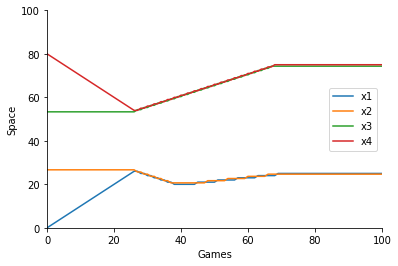

In [13]:
df.T.plot()
plt.xlabel("Games")
plt.ylabel("Space")
sns.despine()
plt.ylim(0,100)

In [14]:
df.iloc[:,-1]

x1    25.000000
x2    24.666667
x3    74.333333
x4    75.000000
Name: 100, dtype: float64